In [15]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Goodness-of-fit

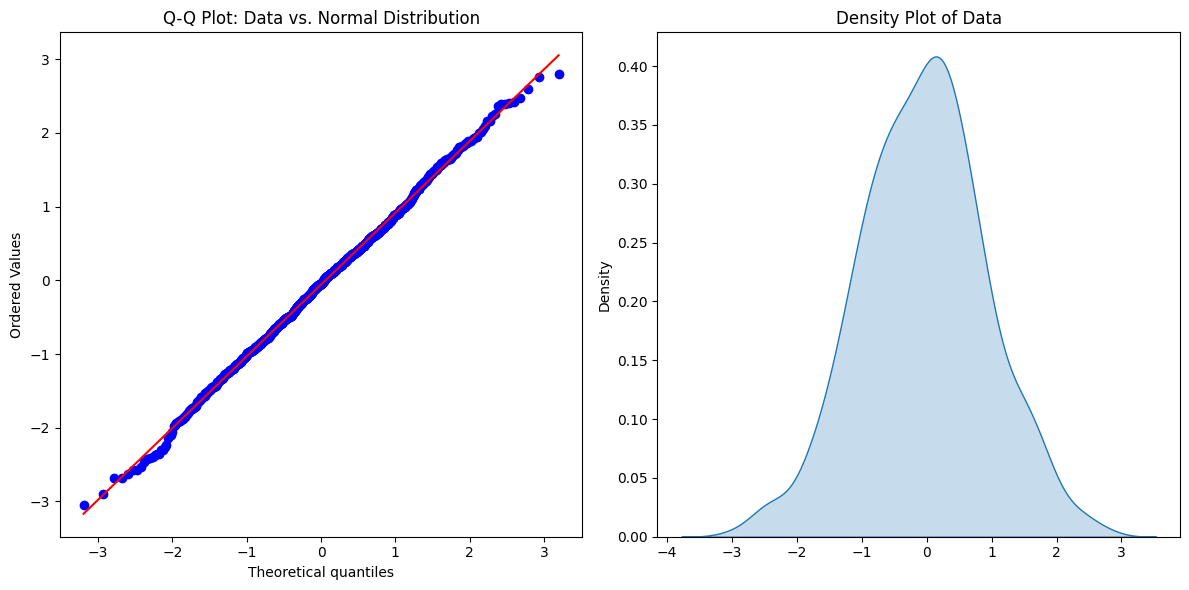

In [ ]:
# Create dummy data
data = np.random.normal(loc=0, scale=1, size=1000)

# Q-Q Plot against normal distribution
plt.figure(figsize=(12, 6))

# Q-Q Plot
plt.subplot(1, 2, 1)
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot: Data vs. Normal Distribution")

# Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data, fill=True)
plt.title("Density Plot of Data")

plt.tight_layout()
plt.show()

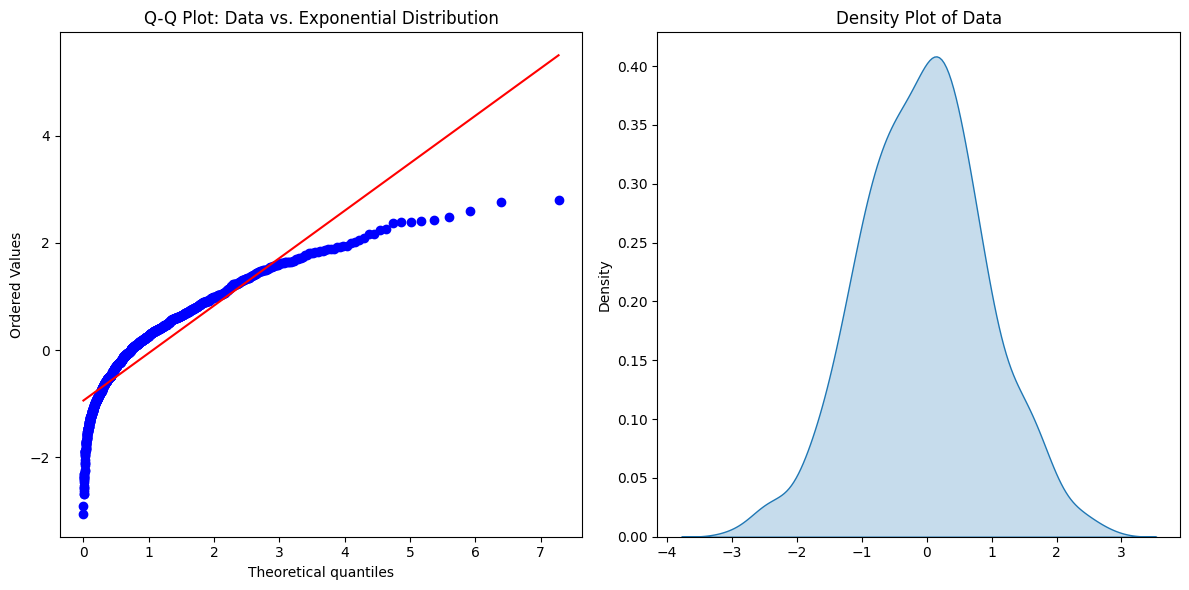

In [14]:
plt.figure(figsize=(12, 6))

# Q-Q Plot against exponential distribution
plt.subplot(1, 2, 1)

stats.probplot(data, dist="expon", plot=plt)
plt.title("Q-Q Plot: Data vs. Exponential Distribution")

# Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data, fill=True)
plt.title("Density Plot of Data")

plt.tight_layout()
plt.show()

# Goodness of fit test

K-S Test: stat=0.0508, p-value=0.9467
Anderson-Darling: stat=0.2534
  15.0% significance: critical=0.5550 → Fail to reject H0
  10.0% significance: critical=0.6320 → Fail to reject H0
  5.0% significance: critical=0.7590 → Fail to reject H0
  2.5% significance: critical=0.8850 → Fail to reject H0
  1.0% significance: critical=1.0530 → Fail to reject H0


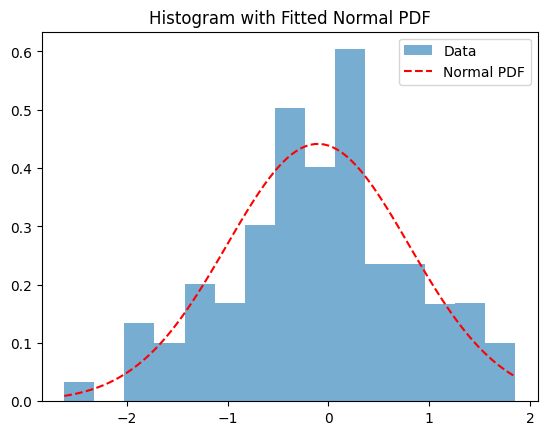

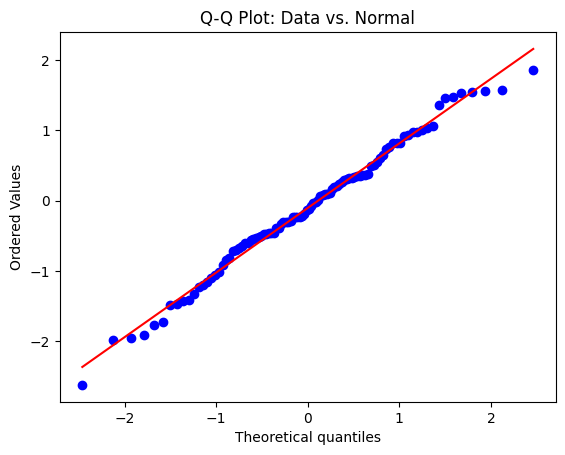

In [16]:

# --- Step 1: Generate synthetic data (replace with your own data) ---
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=100)

# --- Step 2: K-S Test ---
# Null: data comes from standard normal distribution
ks_stat, ks_p = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
print(f"K-S Test: stat={ks_stat:.4f}, p-value={ks_p:.4f}")

# --- Step 3: Anderson-Darling Test ---
ad_result = stats.anderson(data, dist='norm')
print(f"Anderson-Darling: stat={ad_result.statistic:.4f}")
for i in range(len(ad_result.critical_values)):
    sig_level = ad_result.significance_level[i]
    crit = ad_result.critical_values[i]
    result = "Reject H0" if ad_result.statistic > crit else "Fail to reject H0"
    print(f"  {sig_level}% significance: critical={crit:.4f} → {result}")

# --- Step 4: Visualization (Optional but helpful) ---
# Histogram + PDF
plt.hist(data, bins=15, density=True, alpha=0.6, label='Data')
x = np.linspace(min(data), max(data), 100)
plt.plot(x, stats.norm.pdf(x, np.mean(data), np.std(data)), 'r--', label='Normal PDF')
plt.title('Histogram with Fitted Normal PDF')
plt.legend()
plt.show()

# Q-Q Plot
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot: Data vs. Normal")
plt.show()
